Found 1320 images belonging to 2 classes.
Found 166 images belonging to 2 classes.


c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 28s 600ms/step - accuracy: 0.7694 - loss: 0.5101 - val_accuracy: 0.5783 - val_loss: 0.6352
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 24s 566ms/step - accuracy: 0.8404 - loss: 0.3943 - val_accuracy: 0.5422 - val_loss: 0.6136
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 25s 579ms/step - accuracy: 0.8644 - loss: 0.3382 - val_accuracy: 0.5602 - val_loss: 0.6402
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 26s 623ms/step - accuracy: 0.8795 - loss: 0.2952 - val_accuracy: 0.5663 - val_loss: 0.6073
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 26s 623ms/step - accuracy: 0.8844 - loss: 0.2613 - val_accuracy: 0.8434 - val_loss: 0.4998
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 24s 563ms/step - accuracy: 0.8710 - loss: 0.3058 - val_accuracy: 0.5783 - val_loss: 0.6202
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 23s 552ms/step - accuracy: 0.8957 - loss: 0.2434 - val_accuracy: 0.7108 - val_loss: 0.5239
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 22s 527ms/step - accuracy: 0.9120 - loss: 0.2274 - val_accu

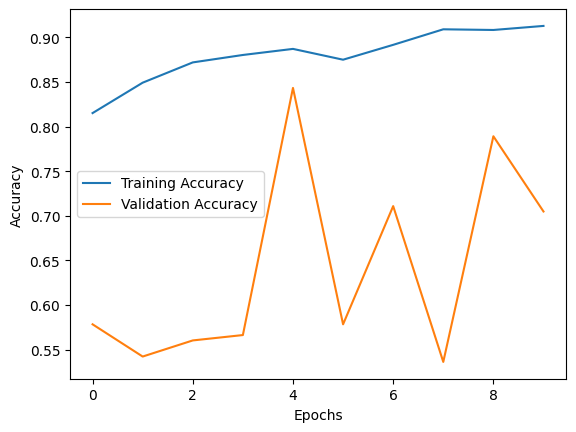

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 220ms/step
[[21 66]
 [17 62]]
              precision    recall  f1-score   support

    non-fire       0.55      0.24      0.34        87
        fire       0.48      0.78      0.60        79

    accuracy                           0.50       166
   macro avg       0.52      0.51      0.47       166
weighted avg       0.52      0.50      0.46       166



In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Đường dẫn đến thư mục chứa dữ liệu ảnh
train_path = "Fire_Detection_Data/train"  # Thư mục chứa ảnh huấn luyện
test_path  = "Fire_Detection_Data/test"   # Thư mục chứa ảnh kiểm tra

# Tạo các bộ sinh dữ liệu (Data Generator) với tiền xử lý
train_datagen = ImageDataGenerator(rescale=1.0/255, rotation_range=30, 
                                   width_shift_range=0.2, height_shift_range=0.2, 
                                   shear_range=0.2, zoom_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1.0/255)

# Load và chuẩn bị dữ liệu
train_data = train_datagen.flow_from_directory(train_path, target_size=(64, 64), 
                                               batch_size=32, class_mode='binary')

test_data = test_datagen.flow_from_directory(test_path, target_size=(64, 64), 
                                             batch_size=32, class_mode='binary')

# Xây dựng mô hình CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
# Compile mô hình
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình
history = model.fit(train_data, validation_data=test_data, epochs=10)

# Đánh giá mô hình
test_loss, test_acc = model.evaluate(test_data)
print(f"Độ chính xác trên tập kiểm tra: {test_acc * 100:.2f}%")

# Vẽ đồ thị quá trình huấn luyện
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Ma trận nhầm lẫn và báo cáo phân loại
y_true = test_data.classes
y_pred = np.round(model.predict(test_data)).flatten()
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred, target_names=['non-fire', 'fire']))

<h6>train_datagen = ImageDataGenerator( <p></p>
    rescale=1.0/255,               # Chuyển đổi giá trị pixel từ [0, 255] sang [0, 1]<p></p>
    rotation_range=30,              # Xoay ảnh ngẫu nhiên trong khoảng ±30 độ<p></p>
    width_shift_range=0.2,          # Dịch chuyển ảnh theo chiều ngang lên đến 20% chiều rộng ảnh<p></p>
    height_shift_range=0.2,         # Dịch chuyển ảnh theo chiều dọc lên đến 20% chiều cao ảnh<p></p>
    shear_range=0.2,                # Biến dạng hình ảnh theo cách "kéo nghiêng" lên đến 20%<p></p>
    zoom_range=0.2,                 # Phóng to hoặc thu nhỏ ảnh ngẫu nhiên trong khoảng ±20%<p></p>
    horizontal_flip=True,           # Lật ngang ảnh ngẫu nhiên<p></p>
    fill_mode='nearest'             # Điền các vùng trống sau khi xoay/dịch chuyển ảnh bằng giá trị pixel gần nhất
)</h6>

In [2]:
# Lưu mô hình đã huấn luyện
model.save("fire_detection_model.h5")


In [3]:
# Tải lại mô hình đã lưu
model = tf.keras.models.load_model("fire_detection_model.h5")

<h5>Đoạn code bên dưới sử dụng một ảnh để nhận diện </h5>

In [5]:
import numpy as np
from tensorflow.keras.preprocessing import image


def predict_fire(img_path, model):
    # Bước 1: Nạp và xử lý ảnh
    img = image.load_img(img_path, target_size=(64, 64))  # Kích thước tương ứng với input của mô hình
    img_array = image.img_to_array(img) / 255.0  # Chuyển đổi ảnh thành mảng số và chuẩn hóa
    img_array = np.expand_dims(img_array, axis=0)  # Thêm chiều batch

    # Bước 2: Dự đoán với mô hình
    prediction = model.predict(img_array)
    
    # Bước 3: Đưa ra kết quả
    if prediction[0][0] < 0.5:  # Vì bạn sử dụng lớp đầu ra sigmoid
        print("Phát hiện cháy!")
    else:
        print("Không phát hiện cháy.")


In [6]:
predict_fire("Fire144.jpg", model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
Phát hiện cháy!


<h4>Đoạn code này sử dụng ảnh từ camera để nhận diện ảnh có lửa <p> Nhấn q để exit</q></h4>

In [9]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image

def predict_fire_from_frame(frame, model, threshold=0.5):
    # Resize frame to match model's input size
    img = cv2.resize(frame, (64, 64))
    img_array = image.img_to_array(img) / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    
    # Make prediction
    prediction = model.predict(img_array)
    
    # Return result based on threshold
    if prediction[0][0] < threshold:
        return "FIRE FIRE FIRE!"
    else:
        return "No FIRE."

# Initialize camera
cap = cv2.VideoCapture(0)  # '0' is typically the default camera, adjust if necessary

while True:
    # Read frame from camera
    ret, frame = cap.read()
    if not ret:
        break
    
    # Apply color filtering to highlight fire-like regions (optional enhancement)
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    lower_red = np.array([0, 50, 50])
    upper_red = np.array([10, 255, 255])
    mask1 = cv2.inRange(hsv, lower_red, upper_red)

    lower_yellow = np.array([18, 50, 50])
    upper_yellow = np.array([35, 255, 255])
    mask2 = cv2.inRange(hsv, lower_yellow, upper_yellow)

    mask = mask1 | mask2  # Combine masks for red and yellow colors
    filtered_frame = cv2.bitwise_and(frame, frame, mask=mask)
    
    # Get prediction
    result = predict_fire_from_frame(filtered_frame, model)
    
    # Display prediction on frame
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(frame, result, (10, 30), font, 1, (0, 0, 255), 2, cv2.LINE_AA)
    
    # Display the frame with prediction
    cv2.imshow("Fire Detection Camera", frame)
    
    # Press 'q' to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the camera and close all windows
cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━